# Model building in Keras

In this tutorial, we compare two modes of building networks within Keras.

First, the [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), allows defining a network "in one place" with all the pieces together. 

Second, the [Functional API](https://www.tensorflow.org/guide/keras/functional) allows building this separately, and leaves it up to the author to link the pieces together. Sometimes, the latter is the only way to go in case of shared inputs for example.


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.initializers import GlorotNormal

2023-11-30 12:24:06.915998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#this configuration uses backend.set_image_data_format('channels_first')

"""
This function creates a model composed by two convolutional + max pooling layers.
After, to standardize the input a batch normalization is applied.
This is put into a single one-dimensional layer using the Flatten layer.
Next, the dropout regularization technique (50%) is perfomed.
Finally, Dense layer output for binary classification
"""
def get_model_design_1(filters: list, input_shape: tuple) -> Sequential:
    model = Sequential([Conv2D(filters[0], (5, 5),  padding='same', kernel_regularizer=l2(0.001), activation=relu, input_shape=input_shape),
                        Conv2D(filters[1], (3, 3),  padding='same', kernel_regularizer=l2(0.001), activation=relu),
                        MaxPool2D(pool_size=(2, 2)),
                        BatchNormalization(),
                        Flatten(),
                        Dropout(0.5),
                        Dense(1, kernel_initializer=GlorotNormal(), activation=sigmoid )
                       ])
    return model

# for this example, we used 128 and 64 filters for the two first conv layers
# note the input size of 3 channel for an image size of 64x64 pixels
model = get_model_design_1([128, 64], (3, 64, 64))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 64, 128)        204928    
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 64, 64)         73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 32, 64)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 1, 32, 64)         256       
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0

Compare the output of the above code to that of the bottom.
Do you see any difference ?

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Convolution2D, MaxPool2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.initializers import GlorotNormal

# this configuration uses backend.set_image_data_format('channels_first')

"""
This design creates the same network than before but using the layer by layer configuration.
Notice the Input layer and each layer description.
Function returns a model which require inputs and outputs (could be multiple of each one)
"""
def get_model_design_2(filters: list, input_shape: tuple) -> Model:
    
    input_layer = tf.keras.Input(shape=input_shape)

    conv1_layer = Convolution2D(filters[0], (5, 5), padding='same', kernel_regularizer=l2(0.001), activation=relu)(input_layer)
    conv2_layer = Convolution2D(filters[1], (3, 3), padding='same', kernel_regularizer=l2(0.001), activation=relu)(conv1_layer)
    #conv3_layer = Convolution2D(filters[1], (3, 3), padding='same', kernel_regularizer=l2(0.001), activation=relu)(conv1_layer)
    maxpool1_layer = MaxPool2D(pool_size=(2, 2))(conv2_layer)
    norm1_layer = BatchNormalization()(maxpool1_layer)

    flat1_layer = Flatten()(norm1_layer)
    drop1_layer = Dropout(0.5)(flat1_layer)
    pred_layer = Dense(1, kernel_initializer=GlorotNormal(), activation=sigmoid)(drop1_layer)

    model = Model(inputs=input_layer, outputs=pred_layer)
    return model

# for this example, we used 128 and 64 filters for the two first conv layers
# note the input size of 3 channel for an image size of 64x64 pixels
model = get_model_design_2([128, 64], (3, 64, 64))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 64, 64)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 64, 128)        204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 64, 64)         73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 32, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 1, 32, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0     

Indeed, there are no differences and the two models are completely equivalent.

Let's have a closer look at the model (graphically).



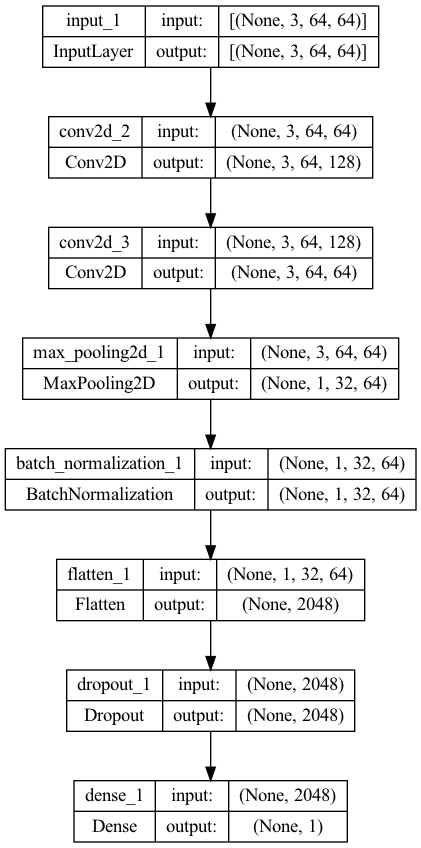

In [4]:
#!pip install pydot
from tensorflow.keras.utils import plot_model

plot_model(model, 'my-CNNmodel.png', show_shapes=True)